### Task 2:

# Introduction: Credit Risk Prediction


## Problem Statement: To predict whether a loan applicant is likely to default using classification models on the Loan Prediction dataset from Kaggle.

### Objective 1: Dataset Understanding and Description

In [1]:
import pandas as pd

In [2]:
#Load the Dataset
df=pd.read_csv("C:/Users/luqma/Downloads/archive/Loan_default.csv")

In [3]:
#Dataset Structure
print("Shape:", df.shape)

Shape: (255347, 18)


In [4]:
#Column Names
print("Columns:", df.columns.tolist())

Columns: ['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']


In [5]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Objective 2: Data Cleaning and Preparation

In [8]:
#Check Missing Values
print(df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [9]:
if df.isnull().sum().sum() == 0:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values found. Consider filling or dropping them.")

✅ No missing values found in the dataset.


### Objective 3: Visualize Key Features

In [10]:
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set(style='whitegrid')

#### Histogram of Loan Amount

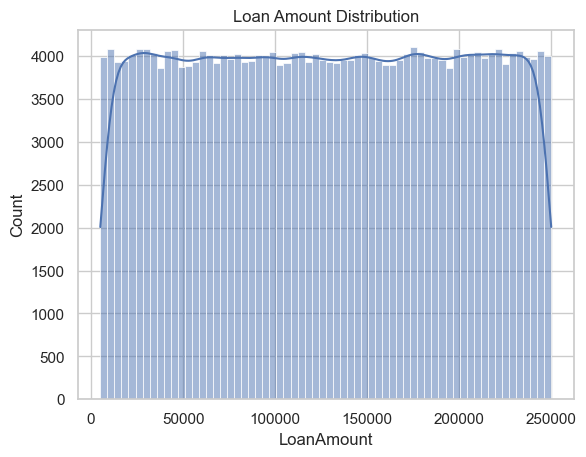

In [12]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

#### Box Plot by Education

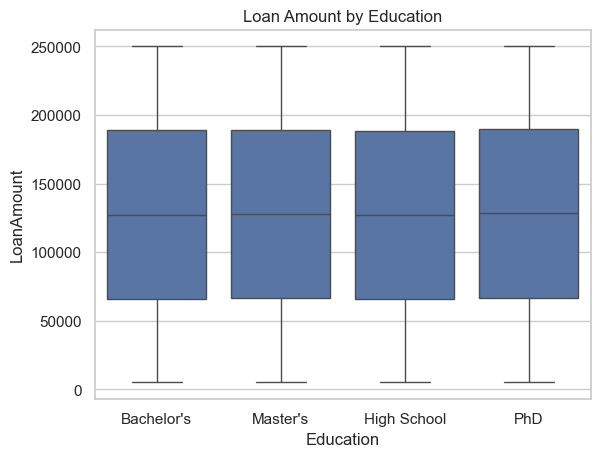

In [13]:
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.show()

#### Income vs LoanAmount

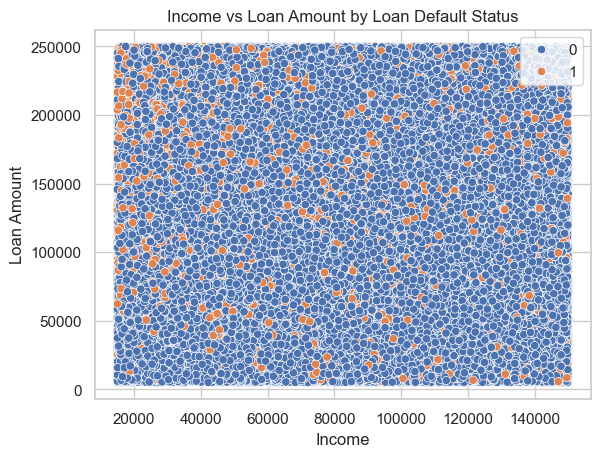

In [14]:
sns.scatterplot(x='Income', y='LoanAmount', hue='Default', data=df)
plt.title('Income vs Loan Amount by Loan Default Status')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.legend(loc='upper right')
plt.show()

### Objective 4: Train a Classification Model

In [15]:
#Import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [17]:
# Before Dropping non-informative columns:
print("Columns before dropping 'LoanID':")
print(df.columns.tolist())

Columns before dropping 'LoanID':
['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']


In [18]:
# Drop non-informative column
df = df.drop('LoanID', axis=1)

In [20]:
# After Dropping non-informative column:
print("\nColumns after dropping 'LoanID':")
print(df.columns.tolist())


Columns after dropping 'LoanID':
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']


In [21]:
# Before encoding categorical features
print("\nBefore encoding:")
display(df[['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']].head())


Before encoding:


,Education,EmploymentType,MaritalStatus,LoanPurpose
0,Bachelor's,Full-time,Divorced,Other
1,Master's,Full-time,Married,Other
2,Master's,Unemployed,Divorced,Auto
3,High School,Full-time,Married,Business
4,Bachelor's,Unemployed,Divorced,Auto


In [22]:
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [23]:
# After encoding categorical features
print("\nAfter encoding:")
display(df_encoded.head())


After encoding:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,True,False,False,False,False,False,False,True,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,True,False,False,True,True,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,True,False,False,False,False,False


In [25]:
# Features
X = df_encoded.drop('Default', axis=1)
print("Feature columns:")
print(X.columns.tolist())

Feature columns:
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education_High School', "Education_Master's", 'Education_PhD', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_Yes', 'HasDependents_Yes', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'HasCoSigner_Yes']


In [26]:
#Target
y = df_encoded['Default']
print("\nTarget distribution:")
print(y.value_counts())


Target distribution:
Default
0    225694
1     29653
Name: count, dtype: int64


In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (204277, 24)
Testing set shape: (51070, 24)


In [28]:
# Feature scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Show preview of scaled data
print("Scaled features (first 5 rows of training set):")
pd.DataFrame(X_train_scaled, columns=X.columns).head()

Scaled features (first 5 rows of training set):


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,-1.699838,1.413785,1.151487,1.711544,-0.967182,-0.449530,-0.454811,1.415720,1.339989,1.732577,...,-0.576783,-0.708078,1.416855,0.999936,-1.000406,1.996074,-0.499997,-0.500173,-0.499798,-1.000563
1,0.234120,-0.649831,-1.715866,1.094714,-0.851727,-0.449530,0.939092,-0.000645,0.993538,1.732577,...,1.733754,-0.708078,-0.705788,-1.000064,0.999594,-0.500983,2.000012,-0.500173,-0.499798,-1.000563
2,-1.166333,0.046770,-0.458437,-0.762072,-1.515594,-0.449530,1.621727,-1.417010,-0.219039,-0.577175,...,-0.576783,1.412274,-0.705788,-1.000064,-1.000406,-0.500983,-0.499997,-0.500173,2.000808,0.999437
3,0.634249,-0.839783,1.440049,-0.258537,1.370784,0.445809,0.143437,1.415720,-1.431615,-0.577175,...,-0.576783,-0.708078,1.416855,0.999936,-1.000406,-0.500983,-0.499997,-0.500173,-0.499798,0.999437
4,0.367496,0.845753,-1.488613,1.673779,-1.717640,1.341148,1.656386,-1.417010,-1.691453,-0.577175,...,-0.576783,-0.708078,1.416855,-1.000064,0.999594,-0.500983,2.000012,-0.500173,-0.499798,0.999437


In [30]:
# Logistic Regression with Scaled Data
log_model = LogisticRegression(solver='liblinear', max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [31]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

### Objective 5: Evaluate the Models

In [32]:
#Import
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

🔍 Logistic Regression Evaluation
✅ Accuracy: 88.58%


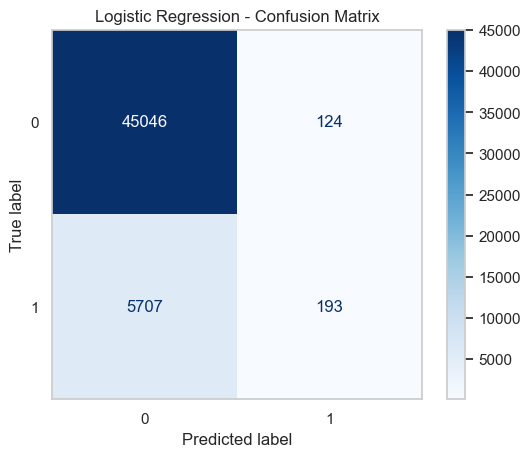

In [33]:
# Logistic Regression Evaluation
log_accuracy = accuracy_score(y_test, y_pred_log)
print("="*50)
print("🔍 Logistic Regression Evaluation")
print(f"✅ Accuracy: {log_accuracy:.2%}")  # percentage format with 2 decimal points
disp_log = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap='Blues')
disp_log.ax_.set_title('Logistic Regression - Confusion Matrix')
plt.grid(False)
plt.show()

🌳 Decision Tree Evaluation
✅ Accuracy: 80.27%


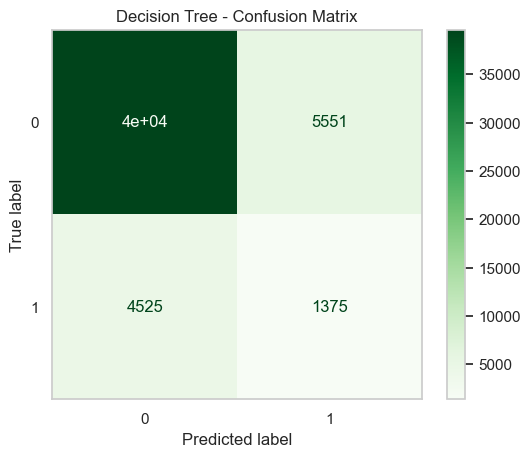

In [34]:
# Decision Tree Evaluation
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("="*50)
print("🌳 Decision Tree Evaluation")
print(f"✅ Accuracy: {tree_accuracy:.2%}")
disp_tree = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Greens')
disp_tree.ax_.set_title('Decision Tree - Confusion Matrix')
plt.grid(False)
plt.show()

In [35]:
# Summary
print("="*50)
print("📋 Model Comparison Summary")
print(f"Logistic Regression Accuracy : {log_accuracy:.2%}")
print(f"Decision Tree Accuracy       : {tree_accuracy:.2%}")
print("="*50)

📋 Model Comparison Summary
Logistic Regression Accuracy : 88.58%
Decision Tree Accuracy       : 80.27%


## ✅ Conclusion

- Explored the **Loan Prediction Dataset** to predict loan default risk.
- Performed basic data checks (null values, structure).
- Handled:
  - **Categorical feature encoding** using `pd.get_dummies()`
  - **Feature scaling** with `StandardScaler`
- Trained two classification models:
  - ✅ **Logistic Regression** (on scaled features)
  - 🌳 **Decision Tree Classifier** (on raw features)
- **Evaluation Metrics Used**:
  - Accuracy Score
  - Confusion Matrix (visualized using `ConfusionMatrixDisplay`)
  
### 🔍 Results:
- **Logistic Regression Accuracy**: `88.58%`
- **Decision Tree Accuracy**: `80.27%`

### 📌 Insights:
- Decision Tree handled categorical and numerical data without scaling.
- Logistic Regression benefited from feature scaling but may require tuning.
- Both models provided reasonable performance, with potential for improvement.
